In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:

df=pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape
df.columns

Index(['age', ' sex', ' cp', ' trestbps', ' chol', ' fbs', ' restecg',
       ' thalach', ' exang', ' oldpeak', ' slope', ' ca', ' thal', ' target'],
      dtype='object')

In [5]:
target=df[' target']
chol=df[' chol']
thalach=df[' thalach']
trestbps=df[' trestbps']

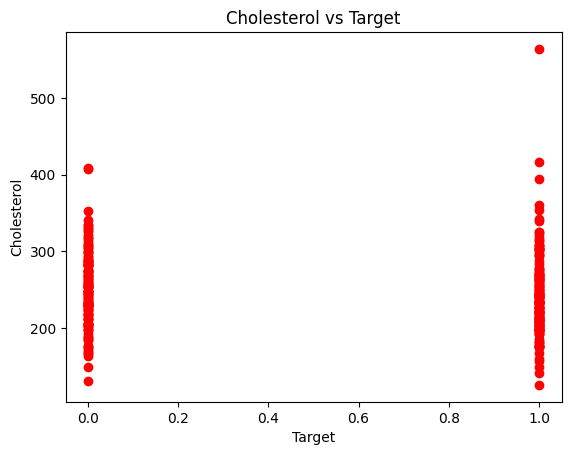

In [6]:
plt.scatter (target, chol , color='red')
plt.xlabel('Target')
plt.ylabel('Cholesterol')
plt.title('Cholesterol vs Target')
plt.show()

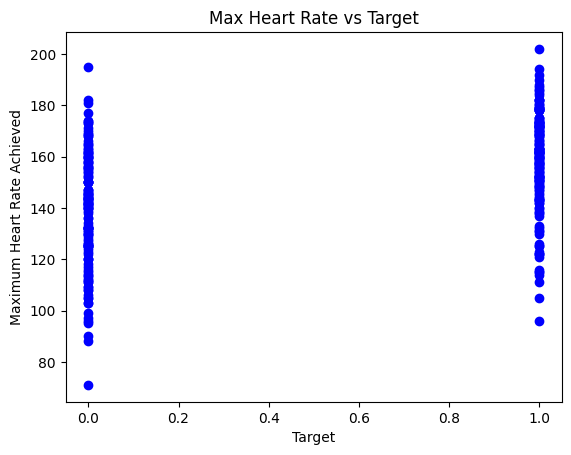

In [10]:
plt.scatter (target, thalach , color='blue')
plt.xlabel('Target')
plt.ylabel('Maximum Heart Rate Achieved') 
plt.title('Max Heart Rate vs Target')
plt.show()

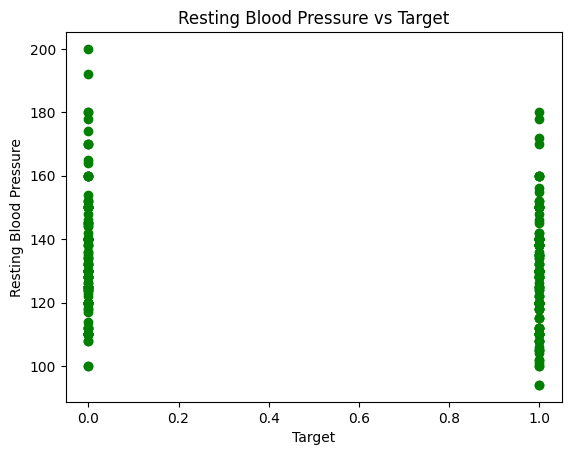

In [11]:
trestbps=df[' trestbps']
plt.scatter (target, trestbps , color='green')
plt.xlabel('Target')    
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure vs Target')
plt.show()

In [14]:
# Separate features (X) and target (y)
X = df.drop(' target', axis=1)
y = df[' target']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [16]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.5, max_iter=1000)  # smaller C = stronger regularization
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [18]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Accuracy: 0.8688524590163934
Confusion Matrix:
 [[25  4]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Cross-validation scores: [0.81967213 0.86885246 0.83606557 0.86666667 0.76666667]
Mean accuracy: 0.831584699453552
